In [1]:
import geopandas as gpd
import pandas as pd
from ast import literal_eval
from shapely.geometry import Polygon


In [41]:
pwd

'C:\\Users\\Zhimin90\\Documents\\CPT\\Geopandas'

In [53]:
df = pd.read_csv("C:\\Users\\Zhimin90\\Documents\\CPT\\CSV\\2017-11-11_4frames_all", index_col=0, converters={"poly_coordinate": literal_eval})

In [54]:
df.head(10)

,start_date,end_date,poly_coordinate,density
0,2017-11-11,2018-11-11,"[[-87.97726, 41.60687], [-87.97627018036073, 4...",-4.523966e-16
1,2017-11-11,2018-11-11,"[[-87.97627018036073, 41.60687], [-87.97528036...",-4.490958e-16
2,2017-11-11,2018-11-11,"[[-87.97528036072144, 41.60687], [-87.97429054...",-4.462013e-16
3,2017-11-11,2018-11-11,"[[-87.97429054108217, 41.60687], [-87.97330072...",-4.430034e-16
4,2017-11-11,2018-11-11,"[[-87.97330072144288, 41.60687], [-87.97231090...",-4.471651e-16
5,2017-11-11,2018-11-11,"[[-87.97231090180361, 41.60687], [-87.97132108...",-4.458753e-16
6,2017-11-11,2018-11-11,"[[-87.97132108216432, 41.60687], [-87.97033126...",-4.470463e-16
7,2017-11-11,2018-11-11,"[[-87.97033126252505, 41.60687], [-87.96934144...",-4.475956e-16
8,2017-11-11,2018-11-11,"[[-87.96934144288578, 41.60687], [-87.96835162...",-4.461419e-16
9,2017-11-11,2018-11-11,"[[-87.96835162324649, 41.60687], [-87.96736180...",-4.518665e-16


In [55]:
df["int_density"] = df.density.astype(int)
df.head(10)


,start_date,end_date,poly_coordinate,density,int_density
0,2017-11-11,2018-11-11,"[[-87.97726, 41.60687], [-87.97627018036073, 4...",-4.523966e-16,0
1,2017-11-11,2018-11-11,"[[-87.97627018036073, 41.60687], [-87.97528036...",-4.490958e-16,0
2,2017-11-11,2018-11-11,"[[-87.97528036072144, 41.60687], [-87.97429054...",-4.462013e-16,0
3,2017-11-11,2018-11-11,"[[-87.97429054108217, 41.60687], [-87.97330072...",-4.430034e-16,0
4,2017-11-11,2018-11-11,"[[-87.97330072144288, 41.60687], [-87.97231090...",-4.471651e-16,0
5,2017-11-11,2018-11-11,"[[-87.97231090180361, 41.60687], [-87.97132108...",-4.458753e-16,0
6,2017-11-11,2018-11-11,"[[-87.97132108216432, 41.60687], [-87.97033126...",-4.470463e-16,0
7,2017-11-11,2018-11-11,"[[-87.97033126252505, 41.60687], [-87.96934144...",-4.475956e-16,0
8,2017-11-11,2018-11-11,"[[-87.96934144288578, 41.60687], [-87.96835162...",-4.461419e-16,0
9,2017-11-11,2018-11-11,"[[-87.96835162324649, 41.60687], [-87.96736180...",-4.518665e-16,0


In [56]:
list = []
for index, row in df.iterrows():
    list.append( [row['start_date'],  row['end_date'],Polygon( row['poly_coordinate']), row['density'], row['int_density']] )

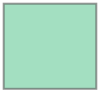

In [58]:
list[0][2]

In [61]:
gdf = geopandas.GeoDataFrame(list, columns =['start_date','end_date', 'geometry', 'density', 'int_density']
    )

In [63]:
gdf_dissolved = gdf.dissolve(by='int_density')

In [64]:
gdf_dissolved

,geometry,start_date,end_date,density
int_density,,,,
-19,"POLYGON ((-87.61301 41.90981, -87.61202 41.909...",2017-11-11,2018-11-11,-19.481632
-18,"POLYGON ((-87.61301 41.91072, -87.61202 41.910...",2017-11-11,2018-11-11,-18.903370
-15,"POLYGON ((-87.61202 41.93983, -87.61202 41.938...",2017-11-11,2018-11-11,-15.180120
-13,"POLYGON ((-87.61301 41.90890, -87.61202 41.908...",2017-11-11,2018-11-11,-13.660623
-12,"MULTIPOLYGON (((-87.61301 41.91072, -87.61301 ...",2017-11-11,2018-11-11,-12.531932
...,...,...,...,...
154,"POLYGON ((-87.62290 41.89253, -87.62191 41.892...",2017-11-11,2018-11-11,154.513168
155,"POLYGON ((-87.62290 41.89071, -87.62191 41.890...",2017-11-11,2018-11-11,155.918884
156,"MULTIPOLYGON (((-87.62290 41.88616, -87.62191 ...",2017-11-11,2018-11-11,156.148834


In [77]:
ax = gdf_dissolved[gdf_dissolved.density].plot()

KeyError: "None of [Float64Index([-19.481632232666016, -18.903369903564453, -15.180119514465332,\n              -13.660622596740724,  -12.53193187713623, -11.888228416442873,\n              -10.245856285095217,   -9.22188949584961,  -8.668924331665039,\n                -7.34432315826416,\n              ...\n               145.08731079101562,  149.02810668945312,  150.45310974121094,\n                151.8295135498047,   152.5105743408203,  154.51316833496094,\n               155.91888427734375,  156.14883422851562,     161.86279296875,\n               167.22549438476562],\n             dtype='float64', length=155)] are in the [columns]"

In [75]:
gdf_dissolved['geometry'].where(gdf_dissolved['int_density'] == 0)

KeyError: 'int_density'

In [78]:
gdf_dissolved.to_csv("2017-11-11_4_test")

In [79]:
gdf_dissolved.to_file("2017-11-11_4_test.geojson", driver='GeoJSON')